In [1]:
import matplotlib.pylab as pl
%matplotlib inline

import cPickle as pickle

experiment settings<br>
</p>
batch size: 128<br>
epochs: 300<br>
learning rate: 0.1<br>
learning rate decay: none<br>
optimizer: SGD<br>
regularization: none<br>
test data: 10000 images<br>
training data: 40000 images<br>
units each hidden layer: 1024<br>
validation data: 10000 images<br>

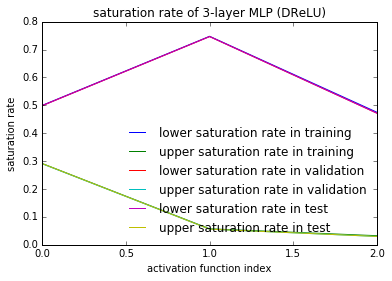

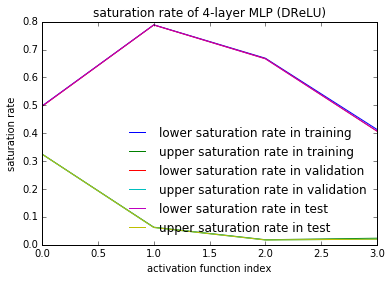

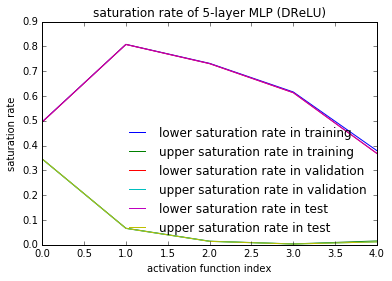

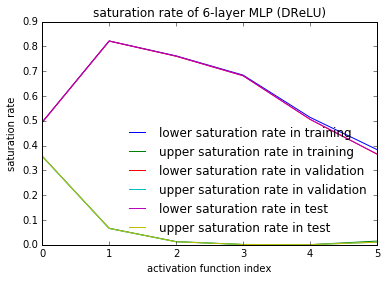

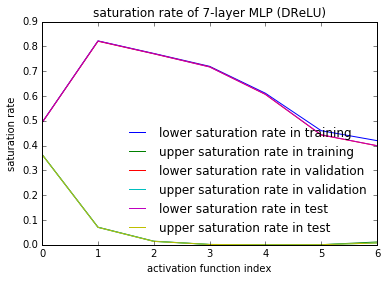

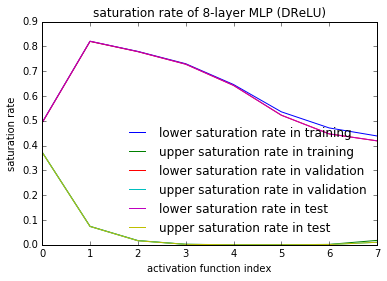

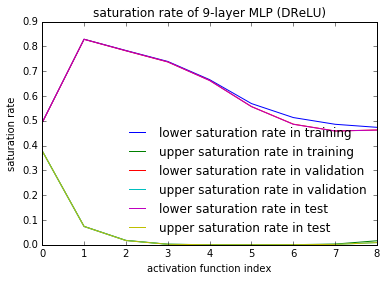

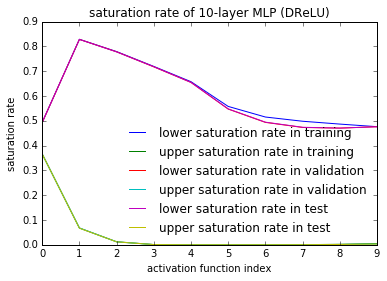

In [2]:
training_history   = []
validation_history = []
test_history       = []
activation = 'DReLU'
for depth in range(3, 11):
    pl.figure()
    pl.title('saturation rate of %d-layer MLP (%s)' % (depth, activation))
    pl.xlabel('activation function index')
    pl.ylabel('saturation rate')
    shape = (1024,) * depth + (10,)
    path = ('../../models/CIFAR-%s10-%s-saturation' % ('{}-' * (len(shape) - 1), activation)).format(*shape[:-1])
    training, validation, test = pickle.load(open(path, 'rb'))
    training_history.append(training)
    validation_history.append(validation)
    test_history.append(test)
    pl.plot(range(len(training)), [h[0] for h in training], label='lower saturation rate in training')
    pl.plot(range(len(training)), [h[1] for h in training], label='upper saturation rate in training')
    pl.plot(range(len(validation)), [h[0] for h in validation], label='lower saturation rate in validation')
    pl.plot(range(len(validation)), [h[1] for h in validation], label='upper saturation rate in validation')
    pl.plot(range(len(test)), [h[0] for h in test], label='lower saturation rate in test')
    pl.plot(range(len(test)), [h[1] for h in test], label='upper saturation rate in test')
    pl.legend(loc='lower right', framealpha=0)

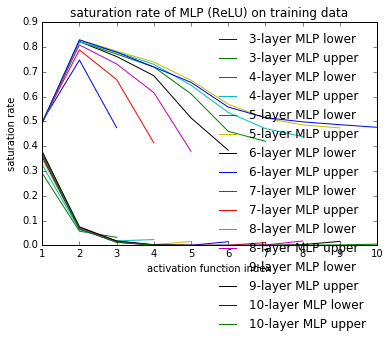

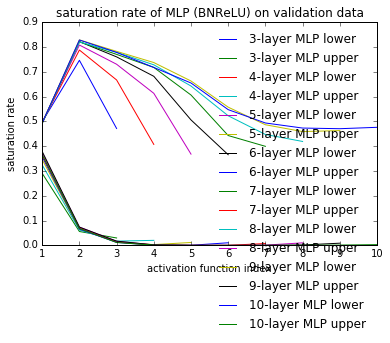

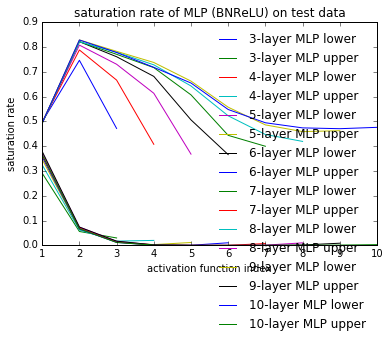

In [3]:
pl.figure()
for index, history in enumerate(training_history):
    pl.plot(range(1, len(history) + 1), [h[0] for h in history], label='%d-layer MLP lower' % (index + 3))
    pl.plot(range(1, len(history) + 1), [h[1] for h in history], label='%d-layer MLP upper' % (index + 3))
pl.title('saturation rate of MLP (ReLU) on training data')
pl.xlabel('activation function index')
pl.ylabel('saturation rate')
pl.legend(framealpha=0)

pl.figure()
for index, history in enumerate(validation_history):
    pl.plot(range(1, len(history) + 1), [h[0] for h in history], label='%d-layer MLP lower' % (index + 3))
    pl.plot(range(1, len(history) + 1), [h[1] for h in history], label='%d-layer MLP upper' % (index + 3))
pl.title('saturation rate of MLP (BNReLU) on validation data')
pl.xlabel('activation function index')
pl.ylabel('saturation rate')
pl.legend(framealpha=0)

pl.figure()
for index, history in enumerate(test_history):
    pl.plot(range(1, len(history) + 1), [h[0] for h in history], label='%d-layer MLP lower' % (index + 3))
    pl.plot(range(1, len(history) + 1), [h[1] for h in history], label='%d-layer MLP upper' % (index + 3))
pl.title('saturation rate of MLP (BNReLU) on test data')
pl.xlabel('activation function index')
pl.ylabel('saturation rate')
pl.legend(framealpha=0)